<a href="https://colab.research.google.com/github/kbdp1305/Telkom-s-Stock-Prediction-using-Genetic-Algorithm/blob/main/GA_Telkom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import random as random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/GA/Telkom Stock Price History.xlsx')
df


,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700
...,...,...,...,...,...,...
444,2022-10-25,4430,4390,4470,4390,109228600
445,2022-10-26,4420,4370,4430,4330,84661900
446,2022-10-27,4390,4370,4410,4340,80281900
447,2022-10-28,4420,4450,4450,4380,68630200


In [ ]:
dataTrain=df.iloc[:int(0.8*len(df)),:]

In [ ]:
dataTrain

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700
...,...,...,...,...,...,...
354,2022-06-20,4050,4040,4060,4000,82101200
355,2022-06-21,4060,4110,4120,4030,77489000
356,2022-06-22,4090,4050,4090,4040,60907800
357,2022-06-23,4030,4160,4160,4030,101065400


In [ ]:
DataTes=splitData(df,dataTrain)

In [ ]:
dataTes

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2022-06-27,4110,4070,4120,4040,71601400
1,2022-06-28,4010,4030,4050,4000,112506000
2,2022-06-29,4000,4040,4080,4000,56878700
3,2022-06-30,4110,4000,4110,4000,116718900
4,2022-07-01,4010,4020,4040,4000,39572500
...,...,...,...,...,...,...
85,2022-10-25,4430,4390,4470,4390,109228600
86,2022-10-26,4420,4370,4430,4330,84661900
87,2022-10-27,4390,4370,4410,4340,80281900
88,2022-10-28,4420,4450,4450,4380,68630200


In [ ]:
dataTrain=df.sample(frac=0.8,ignore_index=True)
dataTrain

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2022-04-19,4740,4680,4750,4680,92268300
1,2022-09-28,4430,4470,4530,4400,104385500
2,2021-01-18,3480,3450,3520,3430,138913100
3,2021-10-08,3730,3800,3800,3720,91361800
4,2022-03-31,4620,4580,4640,4560,108109700
...,...,...,...,...,...,...
354,2022-09-16,4500,4410,4500,4410,210277300
355,2022-06-22,4090,4050,4090,4040,60907800
356,2021-05-21,3340,3270,3350,3270,104101400
357,2021-07-19,3160,3220,3230,3150,116219500


In [ ]:
dataTrain.head(10)

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2022-04-19,4740,4680,4750,4680,92268300
1,2022-09-28,4430,4470,4530,4400,104385500
2,2021-01-18,3480,3450,3520,3430,138913100
3,2021-10-08,3730,3800,3800,3720,91361800
4,2022-03-31,4620,4580,4640,4560,108109700
5,2022-04-20,4680,4630,4690,4620,88360900
6,2021-01-28,3280,3240,3330,3230,142648800
7,2021-10-12,3780,3780,3840,3770,69866300
8,2021-06-11,3490,3470,3500,3420,82336600
9,2021-10-19,3750,3740,3800,3720,61095700


In [ ]:
dataTrain.sort_index(axis=0,ascending=True).head(10)


,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2022-04-19,4740,4680,4750,4680,92268300
1,2022-09-28,4430,4470,4530,4400,104385500
2,2021-01-18,3480,3450,3520,3430,138913100
3,2021-10-08,3730,3800,3800,3720,91361800
4,2022-03-31,4620,4580,4640,4560,108109700
5,2022-04-20,4680,4630,4690,4620,88360900
6,2021-01-28,3280,3240,3330,3230,142648800
7,2021-10-12,3780,3780,3840,3770,69866300
8,2021-06-11,3490,3470,3500,3420,82336600
9,2021-10-19,3750,3740,3800,3720,61095700


In [ ]:
def splitData(df1,df2) :
  #merge two DataFrames and create indicator column
  df_all = df1.merge(df2.drop_duplicates(),
                   how='left', indicator=True)

#create DataFrame with rows that exist in first DataFrame only
  df1_only = df_all[df_all['_merge'] == 'left_only']
  df1_only = df1_only.drop('_merge', axis=1)
  df1_only=df1_only.reset_index()
  df1_only=df1_only.drop('index',axis=1)
  return df1_only


In [ ]:
dataTes=splitData(df,dataTrain)

In [ ]:
dataTes

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2022-06-27,4110,4070,4120,4040,71601400
1,2022-06-28,4010,4030,4050,4000,112506000
2,2022-06-29,4000,4040,4080,4000,56878700
3,2022-06-30,4110,4000,4110,4000,116718900
4,2022-07-01,4010,4020,4040,4000,39572500
...,...,...,...,...,...,...
85,2022-10-25,4430,4390,4470,4390,109228600
86,2022-10-26,4420,4370,4430,4330,84661900
87,2022-10-27,4390,4370,4410,4340,80281900
88,2022-10-28,4420,4450,4450,4380,68630200


In [ ]:
def data_hari(file_data,banyak_data,data_yang_akan_diprediksi) :
  data=file_data.iloc[-(banyak_data):,data_yang_akan_diprediksi:data_yang_akan_diprediksi+1].values
  return data 

In [ ]:
a=data_hari(df,10,1)


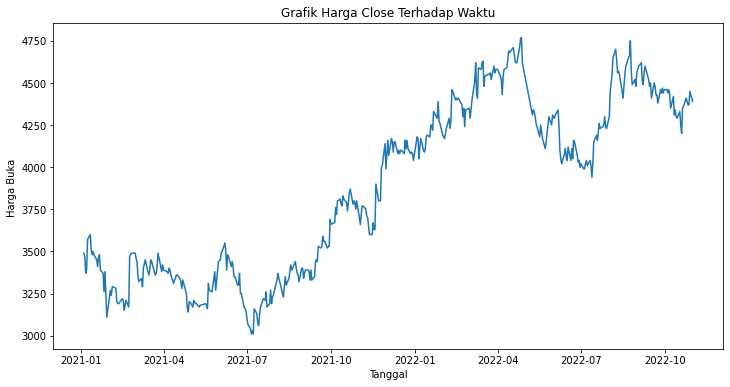

In [ ]:
saham_Telkomsel_y=[]
a=df.iloc[-31:-1,2:3].values
for i in range(len(a)) :
  saham_Telkomsel_y.append(a[i])
saham_Telkomsel_Tanggal=[]
b=df.iloc[-31:-1,0:1]
for j in range(len(b)) :
  saham_Telkomsel_Tanggal.append(j)

plt.figure(figsize=(12, 6))
plt.title("Grafik Harga Close Terhadap Waktu")
plt.plot(df['Tanggal'],df['Tutup'])
plt.xlabel("Tanggal")
plt.ylabel("Harga Buka ")
plt.show
print("\n")
plt.show()

In [ ]:
def create_member(number_of_days) :
  N=number_of_days
  route= np.full(1,random.uniform(-1,1),dtype=float)
  go =True
  i=1
  while go :
    route=np.append(route,random.uniform(-1,1))
    if len(route)==number_of_days :
      go=False
    else :
      i+=1
  return route

In [ ]:
def initiate_population (size,number_of_days) :
  population=[]
  for i in range(size) :
    population.append(create_member(number_of_days))
  return population

In [ ]:
def fitness(population,data) :
  fitness_temp=[]
  fitness=[]
  temporary_y=[]
  data=data.copy()
  temp_hasil=[]
  h=0
  data=data.copy()


 
  final_hasil=[]
  j=0
  for i in population :
    hasil=[]
    usa=[]
    counter=0
    index=(len(data)-1)
    temp_index=(len(data)-1)
    tes_sum=0
    h+=1

    while ((temp_index)>=0 and (index-(len(i)-1))>=0) :

      hasil_akhir=[]
      sum=0
      for j in range(len(i)):
        if temp_index>=0 :
         if j == 0 :
          y=i[j]*1
          sum+=y
          temp_index=temp_index-1
         else : 
          y=i[j]*data[temp_index]
          
          sum+=y
          temp_index=temp_index-1  

        
      tes_sum+=pow(data[index]-sum,2)
      bay=pow(data[index]-sum,2)
      hasil.append(math.sqrt(pow(data[index]-sum,2)))
      counter+=1 
      usa.append(pow(data[index]-sum,2))
      index=index-1
      temp_index=index
      
     

    
    a_temp=(1/counter)*(np.sum(hasil))

    temp_hasil.append(1/a_temp)
  for g in range(len(temp_hasil)) :
    if temp_hasil[g]==max(temp_hasil) :
      temp_index=g

    
  return temp_hasil
    
  



In [ ]:
data_hari(df,5,1)

array([[4430],
       [4420],
       [4390],
       [4420],
       [4460]])

In [ ]:
prob=probability_of_rw(fit)

In [ ]:
def probability_of_rw(fitness) :
  our_fitness=fitness
  sum=0
  prob_per_i=[]
  for i in our_fitness :
    sum+=i
  for j in range(len(our_fitness)):
    prob_per_i.append(our_fitness[j]/sum)
  return prob_per_i
  

In [ ]:
def cumulative_rw(prob) :
  probability_per_i=prob
  sum=0
  cumulative_sum=[0]
  for i in probability_per_i :
    sum+=i
    cumulative_sum.append(sum)
  return cumulative_sum

In [ ]:
cumulative_rw(prob)

[0, 0.6798335072176909, 0.7348086068749529, 0.7940093179666177, 1.0]

In [ ]:
def roullete_whell(population,data,jumlah_anak) : 
  nilai_fitness=fitness(population,data)
  probability_of_roulette = probability_of_rw(nilai_fitness)
  cumulative_sum=cumulative_rw(probability_of_roulette)
  Pool_size=jumlah_anak
  pool=[]
  terpilih=[]
  later_pool=[]
  population=population.copy()
  data=data.copy()
  jumlah_anak=jumlah_anak
  
  
  
  index=0
  while len(pool)<jumlah_anak :
    selisih=10000
    generate_random=random.uniform(0,max(cumulative_sum))
    for i in range(len(cumulative_sum)) :
      if ((cumulative_sum[i]-generate_random) >=0 and (cumulative_sum[i]-generate_random) < selisih and i not in terpilih):
        selisih=(cumulative_sum[i]-generate_random)
        index=(i-1) 
    if (index+1) not in terpilih : 
     pool.append(population[index])
     terpilih.append(index+1)
  while (len(later_pool)+len(pool))<len(population) :
    j=random.randint(0,len(population)-1)
    if j not in terpilih:
      later_pool.append(population[j])
      terpilih.append(j)

  return pool,later_pool







In [ ]:
def mutation(parent,pm) :
  new_parent=np.array([0]*len(parent),dtype=float)
  for i in range(len(parent)) :
    if random.uniform(0,1)<pm :
      new_parent[i] = random.uniform(-1,1)
    else :
      new_parent[i]=parent[i]
  return new_parent


In [ ]:
def crossover(parent1,parent2) :
  k=random.randint(0,len(parent1)-1)
  alpha=0.75
  child1=np.array([0]*len(parent1),dtype=float)
  child2=np.array([0]*len(parent1),dtype=float)
  for i in range(len(parent1)) :
    if i<=k :
      child1[i]=parent1[i]
      child2[i]=parent2[i]
    else:
      child1[i]=(alpha*parent2[i])+((1-alpha)*parent1[i])
      child2[i]=(alpha*parent1[i])+((1-alpha)*parent2[i])
  return child1,child2
      


In [ ]:
def generational_model(mating_pool,population,later_pool,data,pc,pm) :
  N=len(mating_pool)
  pc=pc
  temp_mating=[]
  Cross_Over=[]
  number_of_later_pool=0
  terpilih=[]
  index_choosed=[]
  New_Generation=[]
  population_tidak_terpilih=[]
  fitness_kedua=0
  number_of_mutation=0
  fitness_mating=fitness(mating_pool,data)
  while len(Cross_Over)<len(mating_pool) :
    while len(temp_mating)<2 :
      random_index=random.randint(0,N-1)
      if random.uniform(0,1)<pc and random_index not in terpilih :
        if fitness_mating[random_index]==max(fitness_mating) :
          for f in range(len(mating_pool)) :
            if fitness_mating[f] > fitness_kedua and fitness_mating[f]<max(fitness_mating):
              index_kedua=f
          temp_mating.append(mating_pool[random_index])
          temp_mating.append(mating_pool[index_kedua])
          terpilih.append(random_index)
          terpilih.append(index_kedua)

        else :
          for f in range(len(mating_pool)) :
            if fitness_mating[f] > fitness_kedua and fitness_mating[f]<max(fitness_mating):
              index_kedua=f
          if random_index != index_kedua : 
           temp_mating.append(mating_pool[random_index])
           terpilih.append(random_index)
          else : 
            pass
    a=crossover(temp_mating[0],temp_mating[1])
    Cross_Over+=crossover(temp_mating[0],temp_mating[1])
    temp_mating.pop(0)
    temp_mating.pop(0)
  for k in range(len(Cross_Over)) :
    Cross_Over[k]=mutation(Cross_Over[k],pm)
  
  fitness_for_new_gen=fitness(Cross_Over,data) ## ELITISM
  min_value_new_gen=min(fitness_for_new_gen)
  fitness_old_gen=fitness(mating_pool,data)
  max_old_fitness=max(fitness_old_gen)
  if min_value_new_gen < max_old_fitness :
    for i in range(len(mating_pool)) :
      if fitness_old_gen[i]==max_old_fitness :
        index_old_gen=i
    for j in range(len(Cross_Over)) :
      if fitness_for_new_gen[j]==min_value_new_gen :
        index_new_gen=j
    Cross_Over[index_new_gen]=mating_pool[index_old_gen]
  for k in range(len(Cross_Over)) :
    New_Generation.append(Cross_Over[k])  
                                         

  while len(population_tidak_terpilih)+len(New_Generation)<len(population) :
      population_tidak_terpilih.append(mutation(later_pool[number_of_later_pool],pm))
      number_of_later_pool+=1
  ##Elitism Mutasi
  fitness_new_mutation=fitness(population_tidak_terpilih,data)
  fitness_old_pool=fitness(later_pool,data)
  for b in range(len(later_pool)) :
    if fitness_new_mutation[b] < fitness_old_pool[b] :
      population_tidak_terpilih[b] = later_pool[b]
  while len(New_Generation)<len(population) :
    New_Generation.append(population_tidak_terpilih[number_of_mutation])
    number_of_mutation+=1 
  
  return New_Generation

    


       



In [ ]:
def best_fitness(fitness) :
  maximum=max(fitness)
  return max

In [ ]:
df.head(5)

,Tanggal,Buka,Tutup,Tinggi,Rendah,Volume
0,2021-01-04,3320,3490,3500,3310,165339800
1,2021-01-05,3480,3470,3480,3420,157800700
2,2021-01-06,3470,3370,3490,3330,177877900
3,2021-01-07,3390,3390,3450,3380,140221900
4,2021-01-08,3450,3570,3620,3440,492643700


In [ ]:
def cek_nilai_y(pop,data,tipe_prediksi,hari_ke) :
  sum=0
  data=data.iloc[:,tipe_prediksi:tipe_prediksi+1].values
  
  panjang_data=hari_ke
  for i in range(len(pop)) :
    if i == 0 :
      y=pop[i]*1
      sum+=y
    else :
      y=pop[i]*data[panjang_data-1]
      sum+=y
   
      panjang_data-=1
  return sum
  

  




## Manual Book Code 

1.   Jalankan Main()
2.   Population Size adalah Jumlah Populasi diinginkan
3.   Panjang Kromosom adalah panjang kromosom diinginkan
4.   Probabilitas Cross Over adalah Probabilitas Cross Over diinginkan(Bernilai Float)
5. Probabilitas Mutasi adalah Probabilitas Mutasi diinginkan (Float)
6. Ukuran data adalah banyak data yang akan dipakai (misal 100 data)
7. tipe Prediksi adalah apa yang akan diprediksi (contoh harga buka atau harga tutup)
8. Jumlah Generasi adalah Generasi mau seberapa banyak
9. Akan Memprediksi Hari adalah Hari yang ingin diprediksi hari ke berapa 




In [ ]:
def main() :
  population_size=int(input("Population Size : \n minimal ada 4 Populasi : \n"))
  jumlah_hari=int(input("Panjang Kromosom : "))
  pc=float(input("Probabilitas Cross Over : "))
  pm=float(input("Probabilitas Mutasi : "))
  pop=initiate_population(population_size,jumlah_hari)
  jumlah_data=int(input("Ukuran Data : "))
  tipe_prediksi=int(input("Harga yang akan diprediksi : \n Ketik dalam angka \n 1. Harga Buka \n 2. Harga Tutup \n 3. Harga Tinggi \n 4. Harga Rendah \n "))
  data_hari_sebelum=data_hari(df,jumlah_data,tipe_prediksi)
  data_sebelum=jumlah_hari
  jumlah_generasi = int(input("Jumlah Generasi : "))
  
  if population_size//2 < 4 :
    jumlah_anak_mating=4
  elif (population_size//2)%2==1 :
    jumlah_anak_mating=(population_size//2)+1
  else :
    jumlah_anak_mating =population_size/2

  
  Hari_ke=int(input("Akan Memprediksi Hari ke Berapa : \n "+ "("+str(jumlah_hari-1)+"-"+str(len(df.iloc[:,1:2].values)-1)+")"))
  fitness_terbaik=0
  index_fitness_terbaik=0
  y=0
  plot_y2=[]
  plot_x1=[]
  plot_y1=[]
  
  for i in range(jumlah_generasi) :
    nilai_fitness=fitness(pop,data_hari_sebelum)
    plot_x1.append(i)
    for k in range(len(nilai_fitness)) :
      if nilai_fitness[k]==max(nilai_fitness):
        index_bgen_generasi=k
    plot_y1.append(cek_nilai_y(pop[index_bgen_generasi],df,tipe_prediksi,Hari_ke))
    if max(nilai_fitness) >= fitness_terbaik :
      fitness_terbaik=max(nilai_fitness)
      index_fitness_terbaik=i
      for j in range(len(pop)) :
       if nilai_fitness[j]==fitness_terbaik :
         index=j
    y=cek_nilai_y(pop[index],df,tipe_prediksi,Hari_ke)
    individu_best=pop[index]

      
    pool,later_pool=roullete_whell(pop,data_hari_sebelum,jumlah_anak_mating)
    print("best fitness generation : " + str(i) + " adalah : " + str(max(nilai_fitness)))
    New_Generation=generational_model(pool,pop,later_pool,data_hari_sebelum,pc,pm)
    pop=New_Generation
   
    
    
  print("Fitness Terbaik adalah : "+ str(fitness_terbaik)+" Yang berada di Generasi ke - "+ str(index_fitness_terbaik))
  print("Individu : "+ str(individu_best) + " index : " + str(index))
  print("Nilai prediksi : "+ str(y))
  print("Kesalahan Prediksi : " +str(df.iloc[Hari_ke:Hari_ke+1,tipe_prediksi:tipe_prediksi+1].values-y))
  print("Data Diprediksi : " + str(df.iloc[Hari_ke:Hari_ke+1,tipe_prediksi:tipe_prediksi+1].values))
  plt.plot(plot_x1,plot_y1)
    
  





# Demo Code


## Parameter Pertama :
 

*   Memprediksi Harga Tutup




1.   Jumlah Populasi : 50
2.   Prob Cross Over = 65%
3.   Prob Mutasi = 0.5%
4.   Cacah Generasi = 100
5.   Stopping Criteria : Ketika sudah mencapai Cacah Generasi
6.   Jumlah Data dipakai = 100 Data Terakhir
7.   Prediksi Hari ke = 448 (Hari Terakhir)
8.   Panjang Kromosom = 7
9.   Nilai Alpha = 0.75










Population Size : 
 minimal ada 4 Populasi : 
50
Panjang Kromosom : 7
Probabilitas Cross Over : 0.65
Probabilitas Mutasi : 0.0005
Ukuran Data : 100
Harga yang akan diprediksi : 
 Ketik dalam angka 
 1. Harga Buka 
 2. Harga Tutup 
 3. Harga Tinggi 
 4. Harga Rendah 
 2
Jumlah Generasi : 100
Akan Memprediksi Hari ke Berapa : 
 (6-448)448
best fitness generation : 0 adalah : 0.006988180118557592
best fitness generation : 1 adalah : 0.006988180118557592
best fitness generation : 2 adalah : 0.006988180118557592
best fitness generation : 3 adalah : 0.006988180118557592
best fitness generation : 4 adalah : 0.006988180118557592
best fitness generation : 5 adalah : 0.006988180118557592
best fitness generation : 6 adalah : 0.007006782946399313
best fitness generation : 7 adalah : 0.014434677096428962
best fitness generation : 8 adalah : 0.014434677096428962
best fitness generation : 9 adalah : 0.014434677096428962
best fitness generation : 10 adalah : 0.014434677096428962
best fitness generatio

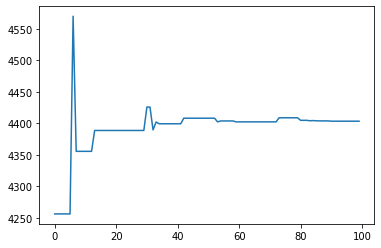

In [ ]:
main()

## Parameter Kedua :
 

*   Memprediksi Harga Tutup




1.   Jumlah Populasi : 100
2.   Prob Cross Over = 80%
3.   Prob Mutasi = 1%
4.   Cacah Generasi = 100
5.   Stopping Criteria : Ketika sudah mencapai Cacah Generasi
6.   Jumlah Data dipakai = 100 Data Terakhir
7.   Prediksi Hari ke = 448 (Hari Terakhir)
8.   Panjang Kromosom = 7
9.   Nilai Alpha = 0.75

Population Size : 
 minimal ada 4 Populasi : 
100
Panjang Kromosom : 7
Probabilitas Cross Over : 0.8
Probabilitas Mutasi : 0.01
Ukuran Data : 100
Harga yang akan diprediksi : 
 Ketik dalam angka 
 1. Harga Buka 
 2. Harga Tutup 
 3. Harga Tinggi 
 4. Harga Rendah 
 2
Jumlah Generasi : 100
Akan Memprediksi Hari ke Berapa : 
 (6-448)448
best fitness generation : 0 adalah : 0.007801636560705699
best fitness generation : 1 adalah : 0.016585302594946495
best fitness generation : 2 adalah : 0.016585302594946495
best fitness generation : 3 adalah : 0.016585302594946495
best fitness generation : 4 adalah : 0.016585302594946495
best fitness generation : 5 adalah : 0.016585302594946495
best fitness generation : 6 adalah : 0.016585302594946495
best fitness generation : 7 adalah : 0.016585302594946495
best fitness generation : 8 adalah : 0.01676471666227128
best fitness generation : 9 adalah : 0.01676471666227128
best fitness generation : 10 adalah : 0.01676471666227128
best fitness generation : 1

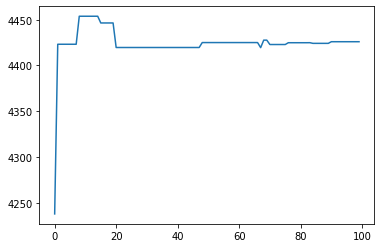

In [ ]:
main()

## Parameter Ketiga :
 

*   Memprediksi Harga Tutup




1.   Jumlah Populasi : 150
2.   Prob Cross Over = 90%
3.   Prob Mutasi = 1%
4.   Cacah Generasi = 100
5.   Stopping Criteria : Ketika sudah mencapai Cacah Generasi
6.   Jumlah Data dipakai = 100 Data Terakhir
7.   Prediksi Hari ke = 448 (Hari Terakhir)
8.   Panjang Kromosom = 7
9.   Nilai Alpha = 0.75

Population Size : 
 minimal ada 4 Populasi : 
150
Panjang Kromosom : 7
Probabilitas Cross Over : 0.9
Probabilitas Mutasi : 0.01
Ukuran Data : 100
Harga yang akan diprediksi : 
 Ketik dalam angka 
 1. Harga Buka 
 2. Harga Tutup 
 3. Harga Tinggi 
 4. Harga Rendah 
 2
Jumlah Generasi : 100
Akan Memprediksi Hari ke Berapa : 
 (6-448)448
best fitness generation : 0 adalah : 0.011361831755809734
best fitness generation : 1 adalah : 0.011361831755809734
best fitness generation : 2 adalah : 0.012944711708656128
best fitness generation : 3 adalah : 0.014174168784363419
best fitness generation : 4 adalah : 0.014174168784363419
best fitness generation : 5 adalah : 0.014872701727627871
best fitness generation : 6 adalah : 0.01732683487124662
best fitness generation : 7 adalah : 0.01732683487124662
best fitness generation : 8 adalah : 0.01732683487124662
best fitness generation : 9 adalah : 0.01732683487124662
best fitness generation : 10 adalah : 0.01732683487124662
best fitness generation : 11 

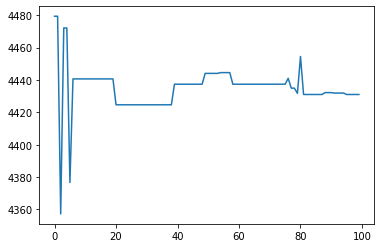

In [ ]:
main()